In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import re
import seaborn as sns
from itertools import product
sys.path.append("/home/yanhu/DddA/DddA/code")
from ddda_dataset import *
import pickle 
from Bio.Seq import Seq

In [2]:
# Create a dictionary for reference regions
ref_range_dict = {
    'range1': ('chrX', 48798803, 48803519),
    'range2': ('chr8', 127733151, 127737826),
    'range3': ('chr3', 141366125, 141371787),
    'range4': ('chr7', 107741812, 107745536),
    'range5': ('chr1', 170530445, 170533865),
    'range6': ('chr21', 38118238, 38127665),
    'range7': ('chr5', 180324459, 180334556),
    'range8': ('chr7', 27158522, 27163197),
}

# Retrieve genomic sequences for each chromosome
genome_seq = {}
for record in SeqIO.parse("/home/yanhu/data/DddA/shared/refGenomes/hg38.fa", "fasta"):
    genome_seq[record.id] = record.seq

# Get all combinations of length 2 using product()
k = 3
kmers = [i for i in product(['A', 'T', 'C', 'G'], repeat=k)]
C_kmers = [''.join(kmer) for kmer in kmers if kmer[(k - 1) // 2] == "C"]
G_kmers = [''.join(kmer) for kmer in kmers if kmer[(k - 1) // 2] == "G"]

# Initialize a dictionary to store edits for each library
libraries = ["HJR245_" + str(i) for i in range(1, 9)]
edit_dict = {library:{} for library in libraries}

In [ ]:
plot_dir = "/home/yanhu/data/DddA/HJR245/plots"
if not os.path.exists(plot_dir):
    os.system("mkdir " + plot_dir)

In [108]:
for library in libraries:

    print("Processing library " + library)
    fastq_dir = os.path.join("/home/yanhu/data/DddA/HJR245/HJR245/", library)

    if not os.path.exists(fastq_dir + "/merged.fastq.gz"):
        os.system("cat " + fastq_dir + "/PAW*fastq.gz > " + fastq_dir + "/merged.fastq.gz")
    
    # Initialize ddda_dataset
    ddda_data = ddda_dataset(
        ID = library, 
        region_dict = ref_range_dict, 
        genome_file = "/home/yanhu/data/DddA/shared/refGenomes/hg38.fa", 
        fastq_file = os.path.join(fastq_dir, "merged.fastq.gz"), 
        working_dir = "/home/yanhu/data/DddA/HJR245/"
    )
    
    # Align reads
    gap_threshold = 500
    ddda_data.align_reads(
        start_gap_threshold = gap_threshold,
        end_gap_threshold = gap_threshold
    )

    for locus in ref_range_dict:
    
        print("Processing locus " + locus)
    
        # Determine whether each strand is a forward C-to-T strand or reverse G-to-A strand
        strand = np.argmax(np.sum(ddda_data.edit_dict[locus], axis=1), axis=1)
        
        # Retrieve genomic sequence in the current locus
        chrom, region_start, region_end = ref_range_dict[locus]
        ref_seq = str(genome_seq[chrom][(region_start - 1):(region_end)]).upper()
        
        # Calculate edit rate for C positions on forward strand reads and G positions on reverse strand reads 
        forward_edits = ddda_data.edit_dict[locus][strand == 0, :, 0]
        reverse_edits = ddda_data.edit_dict[locus][strand == 1, :, 1]
        forward_edit_rate = np.mean(forward_edits, axis=0)
        reverse_edit_rate = np.mean(reverse_edits, axis=0)
        edit_dict[library][locus] = {"forward":forward_edit_rate, "reverse":reverse_edit_rate}

        # Save edit rates
        edit_dict_path = "/home/yanhu/data/DddA/HJR245/HJR245/edit_dict.pkl"
        with open(edit_dict_path, "wb") as f:
            pickle.dump(edit_dict, f)

Processing library HJR245_1
Initializing ddda_dataset object
Loading reference genome
Extracting sequences for each locus
Computing sequence bias
Aligning reads


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 999177/999177 [27:26<00:00, 606.68it/s]


839404 reads aligned. 325059 reads unaligned
range1 n_reads, len_read are (91600, 4717)
range2 n_reads, len_read are (49746, 4676)
range3 n_reads, len_read are (103680, 5663)
range4 n_reads, len_read are (116151, 3725)
range5 n_reads, len_read are (62202, 3421)
range6 n_reads, len_read are (98119, 9428)
range7 n_reads, len_read are (90055, 10098)
range8 n_reads, len_read are (62565, 4676)
Processing locus range1
Processing locus range2
Processing locus range3
Processing locus range4
Processing locus range5
Processing locus range6
Processing locus range7
Processing locus range8
Processing library HJR245_2
Initializing ddda_dataset object
Loading reference genome
Extracting sequences for each locus
Computing sequence bias
Aligning reads


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 367463/367463 [08:10<00:00, 749.13it/s]


321964 reads aligned. 134232 reads unaligned
range1 n_reads, len_read are (41831, 4717)
range2 n_reads, len_read are (31758, 4676)
range3 n_reads, len_read are (18785, 5663)
range4 n_reads, len_read are (35948, 3725)
range5 n_reads, len_read are (33739, 3421)
range6 n_reads, len_read are (11156, 9428)
range7 n_reads, len_read are (23145, 10098)
range8 n_reads, len_read are (36869, 4676)
Processing locus range1
Processing locus range2
Processing locus range3
Processing locus range4
Processing locus range5
Processing locus range6
Processing locus range7
Processing locus range8
Processing library HJR245_3
Initializing ddda_dataset object
Loading reference genome
Extracting sequences for each locus
Computing sequence bias
Aligning reads


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 697531/697531 [19:08<00:00, 607.41it/s]


605232 reads aligned. 207227 reads unaligned
range1 n_reads, len_read are (89624, 4717)
range2 n_reads, len_read are (80961, 4676)
range3 n_reads, len_read are (54536, 5663)
range4 n_reads, len_read are (71930, 3725)
range5 n_reads, len_read are (81347, 3421)
range6 n_reads, len_read are (20104, 9428)
range7 n_reads, len_read are (34529, 10098)
range8 n_reads, len_read are (57273, 4676)
Processing locus range1
Processing locus range2
Processing locus range3
Processing locus range4
Processing locus range5
Processing locus range6
Processing locus range7
Processing locus range8
Processing library HJR245_4
Initializing ddda_dataset object
Loading reference genome
Extracting sequences for each locus
Computing sequence bias
Aligning reads


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1031992/1031992 [29:04<00:00, 591.65it/s]


845268 reads aligned. 308930 reads unaligned
range1 n_reads, len_read are (120515, 4717)
range2 n_reads, len_read are (124028, 4676)
range3 n_reads, len_read are (92924, 5663)
range4 n_reads, len_read are (98967, 3725)
range5 n_reads, len_read are (118135, 3421)
range6 n_reads, len_read are (33423, 9428)
range7 n_reads, len_read are (33520, 10098)
range8 n_reads, len_read are (101550, 4676)
Processing locus range1
Processing locus range2
Processing locus range3
Processing locus range4
Processing locus range5
Processing locus range6
Processing locus range7
Processing locus range8
Processing library HJR245_5
Initializing ddda_dataset object
Loading reference genome
Extracting sequences for each locus
Computing sequence bias
Aligning reads


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 496921/496921 [09:36<00:00, 861.46it/s]


430135 reads aligned. 147061 reads unaligned
range1 n_reads, len_read are (12, 4717)
range2 n_reads, len_read are (111, 4676)
range3 n_reads, len_read are (79261, 5663)
range4 n_reads, len_read are (101596, 3725)
range5 n_reads, len_read are (96969, 3421)
range6 n_reads, len_read are (22404, 9428)
range7 n_reads, len_read are (9438, 10098)
range8 n_reads, len_read are (40069, 4676)
Processing locus range1
Processing locus range2
Processing locus range3
Processing locus range4
Processing locus range5
Processing locus range6
Processing locus range7
Processing locus range8
Processing library HJR245_6
Initializing ddda_dataset object
Loading reference genome
Extracting sequences for each locus
Computing sequence bias
Aligning reads


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 662129/662129 [16:02<00:00, 688.23it/s]


588073 reads aligned. 209995 reads unaligned
range1 n_reads, len_read are (73831, 4717)
range2 n_reads, len_read are (64141, 4676)
range3 n_reads, len_read are (48764, 5663)
range4 n_reads, len_read are (76436, 3725)
range5 n_reads, len_read are (37295, 3421)
range6 n_reads, len_read are (47312, 9428)
range7 n_reads, len_read are (47363, 10098)
range8 n_reads, len_read are (56992, 4676)
Processing locus range1
Processing locus range2
Processing locus range3
Processing locus range4
Processing locus range5
Processing locus range6
Processing locus range7
Processing locus range8
Processing library HJR245_7
Initializing ddda_dataset object
Loading reference genome
Extracting sequences for each locus
Computing sequence bias
Aligning reads


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 564787/564787 [14:22<00:00, 654.58it/s]


479034 reads aligned. 186062 reads unaligned
range1 n_reads, len_read are (63233, 4717)
range2 n_reads, len_read are (58888, 4676)
range3 n_reads, len_read are (39925, 5663)
range4 n_reads, len_read are (51822, 3725)
range5 n_reads, len_read are (59884, 3421)
range6 n_reads, len_read are (13264, 9428)
range7 n_reads, len_read are (24990, 10098)
range8 n_reads, len_read are (66719, 4676)
Processing locus range1
Processing locus range2
Processing locus range3
Processing locus range4
Processing locus range5
Processing locus range6
Processing locus range7
Processing locus range8
Processing library HJR245_8
Initializing ddda_dataset object
Loading reference genome
Extracting sequences for each locus
Computing sequence bias
Aligning reads


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 795000/795000 [24:33<00:00, 539.42it/s]


626180 reads aligned. 270675 reads unaligned
range1 n_reads, len_read are (89400, 4717)
range2 n_reads, len_read are (16222, 4676)
range3 n_reads, len_read are (70802, 5663)
range4 n_reads, len_read are (65479, 3725)
range5 n_reads, len_read are (103620, 3421)
range6 n_reads, len_read are (29538, 9428)
range7 n_reads, len_read are (51080, 10098)
range8 n_reads, len_read are (98184, 4676)
Processing locus range1
Processing locus range2
Processing locus range3
Processing locus range4
Processing locus range5
Processing locus range6
Processing locus range7
Processing locus range8


In [117]:
# Load results
edit_dict_path = "/home/yanhu/data/DddA/HJR245/HJR245/edit_dict.pkl"
with open(edit_dict_path, "rb") as f:
    edit_dict = pickle.load(f)

In [265]:
# Calculate observed bias
bias_dict = {library:{"forward":{key:[] for key in C_kmers}, 
             "reverse":{key:[] for key in G_kmers}} for library in libraries}
for library in edit_dict.keys():
    for locus in list(ref_range_dict.keys())[:4]:

        # Retrieve genomic sequence in the current locus
        chrom, region_start, region_end = ref_range_dict[locus]
        ref_seq = str(genome_seq[chrom][(region_start - 1):(region_end)]).upper()

        # Retreve observed edit rate at each base pair
        forward_edit_rate = edit_dict[library][locus]["forward"]
        reverse_edit_rate = edit_dict[library][locus]["reverse"]
        
        # Retrieve kmer context and edit bias at each position
        kmer_radius =  (k - 1) // 2
        scan_start = gap_threshold + kmer_radius + 1
        scan_end = len(forward_edit_rate) - gap_threshold - kmer_radius
        for i in range(scan_start, scan_end):
            if ref_seq[i] == "C":
                context = ref_seq[(i - kmer_radius):(i + kmer_radius + 1)]
                bias_dict[library]["forward"][context].append(forward_edit_rate[i])
            elif ref_seq[i] == "G":
                context = ref_seq[(i - kmer_radius):(i + kmer_radius + 1)]
                bias_dict[library]["reverse"][context].append(reverse_edit_rate[i]) 

In [267]:
correlations = []
library = "HJR245_7"
for locus in ref_range_dict.keys():
    
    # Retrieve genomic sequence in the current locus
    chrom, region_start, region_end = ref_range_dict[locus]
    ref_seq = str(genome_seq[chrom][(region_start - 1):(region_end)]).upper()
    
    # Retrieve observed bias
    len_region = len(ref_seq)
    start, end = 1, len_region - 1
    obs_bias = edit_dict[library][locus]["forward"][start:end]
    
    # Retrieve observed DddA bias on both forward and reverse strands
    forward_bias = {key:np.mean(value) for key, value in bias_dict[library]["forward"].items()}
    reverse_bias = {str(Seq(key).reverse_complement()):np.mean(value) for key, value in bias_dict[library]["reverse"].items()}
    
    pred_bias = np.zeros(len_region - 2)
    for i in range(start, end):
        if ref_seq[i] == "C":
            pred_bias[i - 1] = forward_bias[ref_seq[(i - 1):(i + 2)]]
    
    correlations.append(ss.pearsonr(obs_bias, pred_bias).statistic)

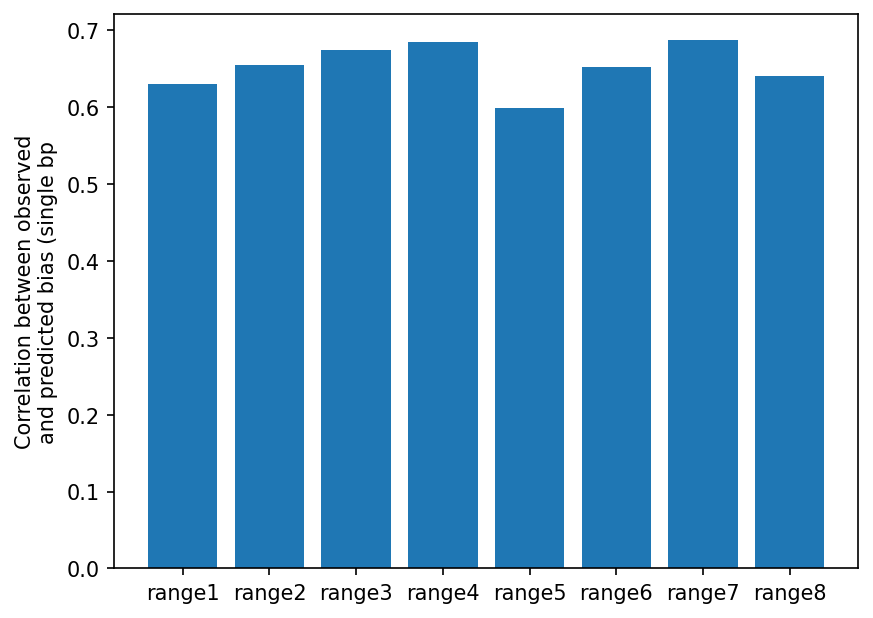

In [268]:
plt.figure(dpi = 150)
plt.bar(np.arange(len(correlations)), correlations)
plt.ylabel("Correlation between observed\nand predicted bias (single bp")
plt.xticks(np.arange(8), ref_range_dict.keys())
plt.show()

0.6407163058921106

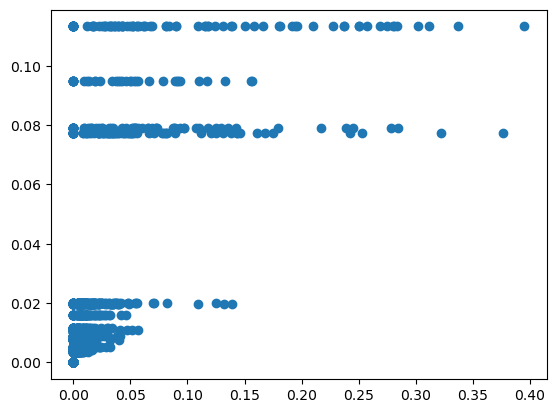

In [269]:
plt.scatter(obs_bias, pred_bias)
import scipy.stats as ss
ss.pearsonr(obs_bias, pred_bias).statistic

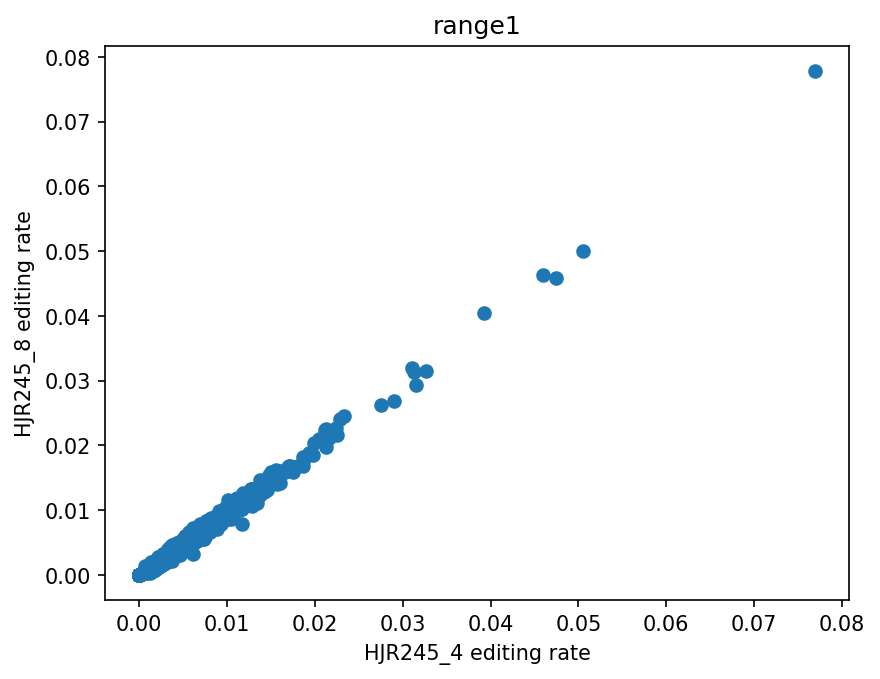

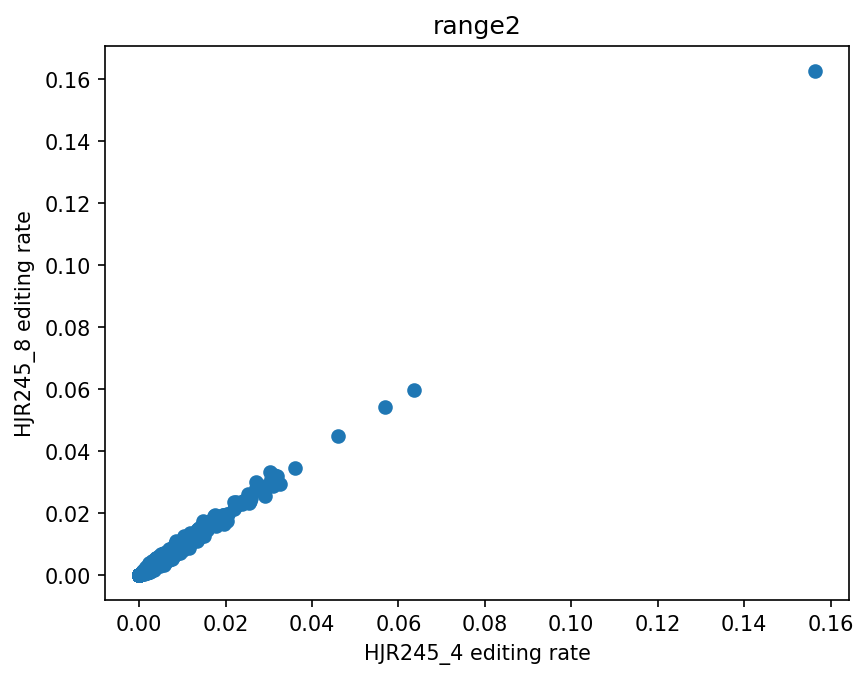

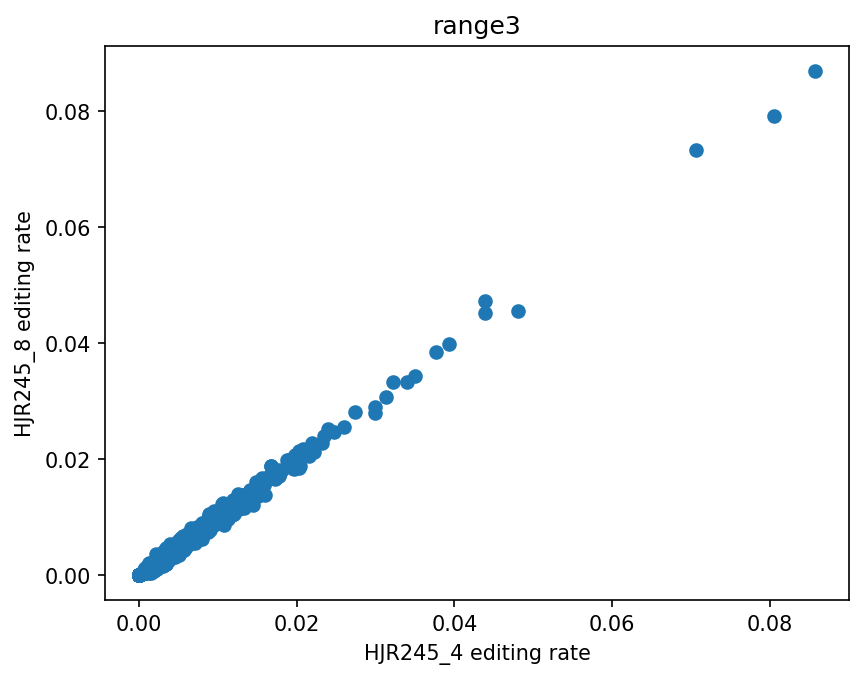

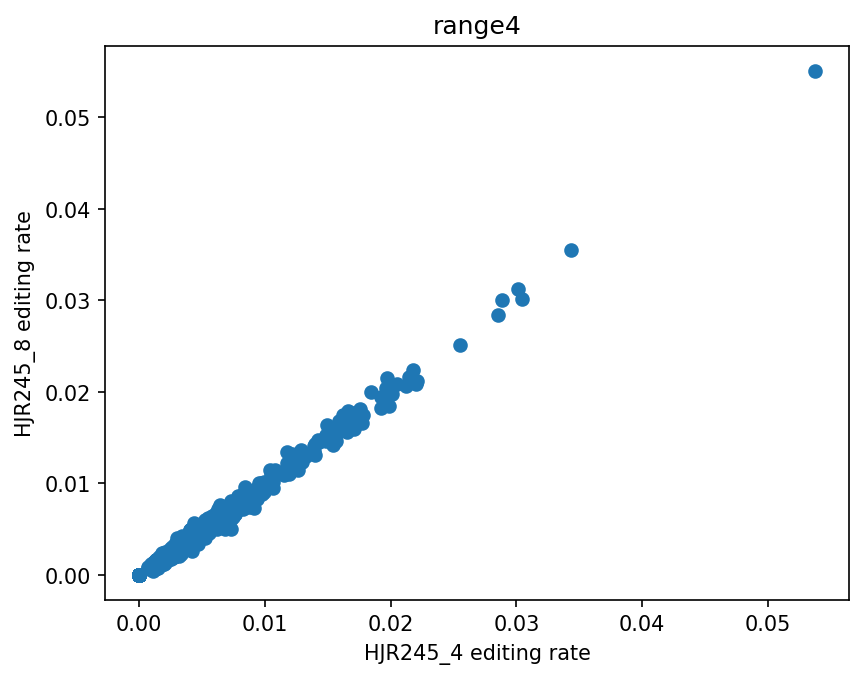

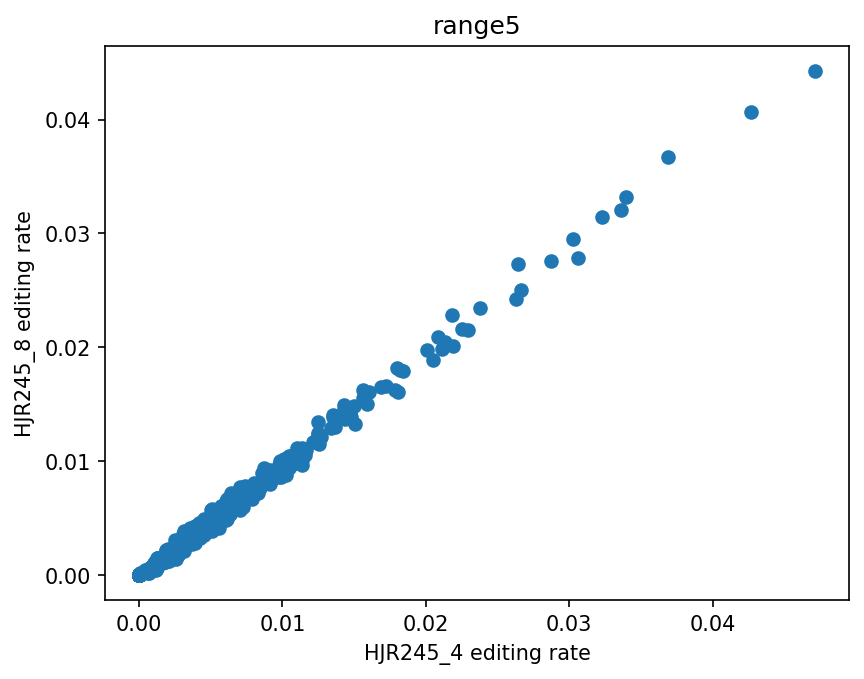

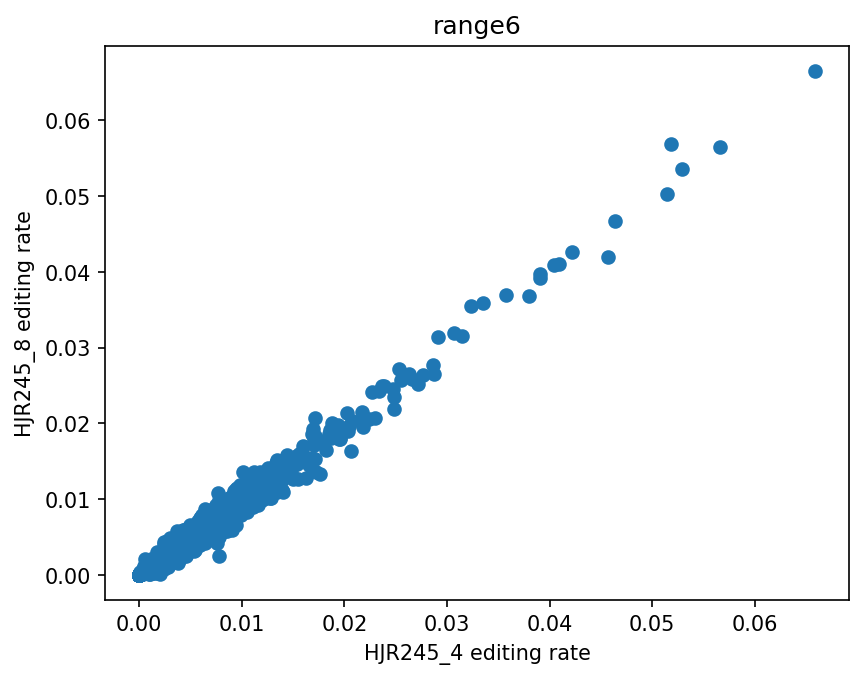

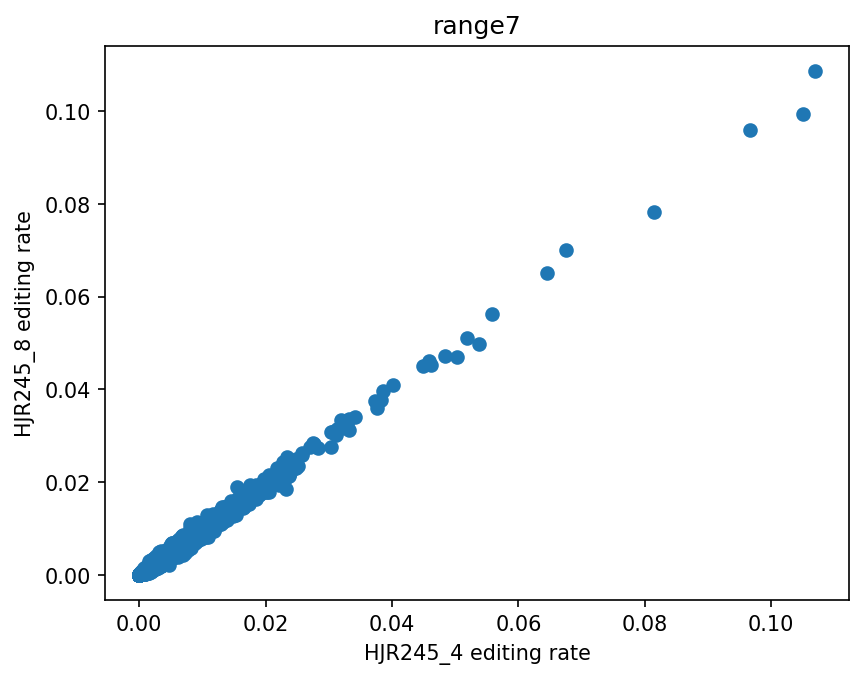

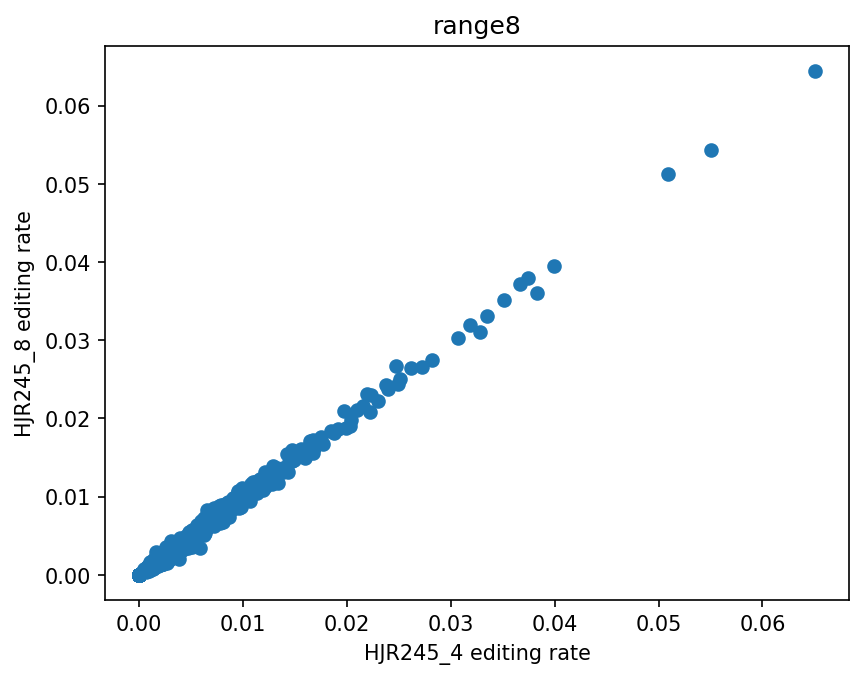

In [270]:
lib_x, lib_y = "HJR245_4", "HJR245_8"
for locus in ref_range_dict.keys():
    plt.figure(dpi = 150)
    vec_1 = edit_dict[lib_x][locus]["forward"]
    vec_2 = edit_dict[lib_y][locus]["forward"]
    plt.xlabel(lib_x + " editing rate")
    plt.ylabel(lib_y + " editing rate")
    plt.title(locus)
    plt.scatter(vec_1, vec_2)
    plt.savefig(os.path.join(plot_dir, "observed_edits_" + lib_x + \
                             "_vs_" + lib_y + "_" + locus + ".pdf"))

In [271]:
forward_bias = {key:np.mean(value) for key, value in bias_dict["HJR245_7"]["forward"].items()}
reverse_bias = {key:np.mean(value) for key, value in bias_dict["HJR245_7"]["reverse"].items()}

In [275]:
final_bias = {"forward":forward_bias, "reverse":reverse_bias}
with open("/home/yanhu/data/DddA/HJR245/bias_dict.pkl", "wb") as f:
    pickle.dump(final_bias, f)